apm 118.201.101.210_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            4
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:           3897
 Number of total equations: -         3800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             97
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ip

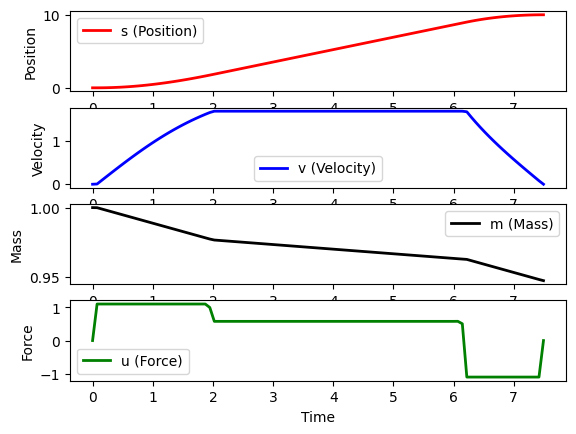

In [1]:
## https://apmonitor.com/do/index.php/Main/RocketOptimization

import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

# create GEKKO model
m = GEKKO()

# scale 0-1 time with tf
m.time = np.linspace(0,1,101)

# options
m.options.NODES = 6
m.options.SOLVER = 3
m.options.IMODE = 6
m.options.MAX_ITER = 500
m.options.MV_TYPE = 0
m.options.DIAGLEVEL = 0

# final time
tf = m.FV(value=1.0,lb=0.1,ub=100)
tf.STATUS = 1

# force
u = m.MV(value=0,lb=-1.1,ub=1.1)
u.STATUS = 1
u.DCOST = 1e-5

# variables
s = m.Var(value=0)
v = m.Var(value=0,lb=0,ub=1.7)
mass = m.Var(value=1,lb=0.2)

# differential equations scaled by tf
m.Equation(s.dt()==tf*v)
m.Equation(mass*v.dt()==tf*(u-0.2*v**2))
m.Equation(mass.dt()==tf*(-0.01*u**2))

# specify endpoint conditions
m.fix(s, pos=len(m.time)-1,val=10.0)
m.fix(v, pos=len(m.time)-1,val=0.0)

# minimize final time
m.Obj(tf)

# Optimize launch
m.solve()

print('Optimal Solution (final time): ' + str(tf.value[0]))

# scaled time
ts = m.time * tf.value[0]

# plot results
plt.figure(1)
plt.subplot(4,1,1)
plt.plot(ts,s.value,'r-',lw=2)
plt.ylabel('Position')
plt.legend(['s (Position)'])

plt.subplot(4,1,2)
plt.plot(ts,v.value,'b-',lw=2)
plt.ylabel('Velocity')
plt.legend(['v (Velocity)'])

plt.subplot(4,1,3)
plt.plot(ts,mass.value,'k-',lw=2)
plt.ylabel('Mass')
plt.legend(['m (Mass)'])

plt.subplot(4,1,4)
plt.plot(ts,u.value,'g-',lw=2)
plt.ylabel('Force')
plt.legend(['u (Force)'])

plt.xlabel('Time')
plt.show()